# Kaggle Bike Sharing Demand
https://www.kaggle.com/c/bike-sharing-demand
<br>
<br>
* Bike_Sharing_Demand.csv (10,886 * 12)
  * datetime : Date + Timestamp
  * season : 1(봄), 2(여름), 3(가을), 4(겨울)
  * holiday : 1(토요일, 일요일을 제외한 공휴일), 0(휴일이 아닌 날)
  * workingday : 1(토요일, 일요일 및 휴일이 아닌 주중), 0(주말 및 휴일)
  * weather : 1(맑음, 약간흐림), 2(안개, 흐림), 3(가벼운 눈/비 + 천둥), 4(심한 눈/비, 천둥/번개)
  * temp : 온도(섭씨)
  * atemp : 체감온도(섭씨)
  * humidity : 습도
  * windspeed : 풍속
  * casual : 사전 등록되지 않은 사용자 대여 횟수
  * registered : 사전 등록된 사용자 대여 횟수
  * count : 총 대여 횟수 -> y

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Load
* 'Bike_Sharing_Demand.csv' Github에서 읽어오기

In [2]:
import pandas as pd


url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Bike_Sharing_Demand.csv'
DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


# I. Data Preprocessing

> ## 1) 'String' -> 'Date'

* 'year', 'month', 'day', 'hour' 추출

In [4]:
DF['datetime'] = DF.datetime.apply(pd.to_datetime)

DF['year'] = DF.datetime.apply(lambda x : x.year)
DF['month'] = DF.datetime.apply(lambda x : x.month)
DF['day'] = DF.datetime.apply(lambda x : x.day)
DF['hour'] = DF.datetime.apply(lambda x: x.hour)

In [5]:
DF.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


> ## 2) Drop Columns

* 'datetime', 'casual', 'registered'

In [6]:
drop_columns = ['datetime', 'casual', 'registered']

DF_copy = DF.copy()

DF.drop(drop_columns, axis = 1,inplace = True)

In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int64  
 10  month       10886 non-null  int64  
 11  day         10886 non-null  int64  
 12  hour        10886 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 1.1 MB


In [8]:
DF['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

## 과제

---

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [10]:
DF.count

<bound method DataFrame.count of        season  holiday  workingday  weather   temp   atemp  humidity  \
0           1        0           0        1   9.84  14.395        81   
1           1        0           0        1   9.02  13.635        80   
2           1        0           0        1   9.02  13.635        80   
3           1        0           0        1   9.84  14.395        75   
4           1        0           0        1   9.84  14.395        75   
...       ...      ...         ...      ...    ...     ...       ...   
10881       4        0           1        1  15.58  19.695        50   
10882       4        0           1        1  14.76  17.425        57   
10883       4        0           1        1  13.94  15.910        61   
10884       4        0           1        1  13.94  17.425        61   
10885       4        0           1        1  13.12  16.665        66   

       windspeed  count  year  month  day  hour  
0         0.0000     16  2011      1    1     0  
1 

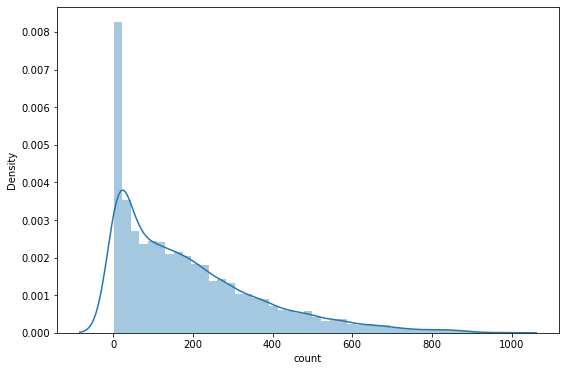

In [11]:
plt.figure(figsize = (9, 6))
sns.distplot(DF['count'],
             hist = True,
             kde = True)
plt.show()

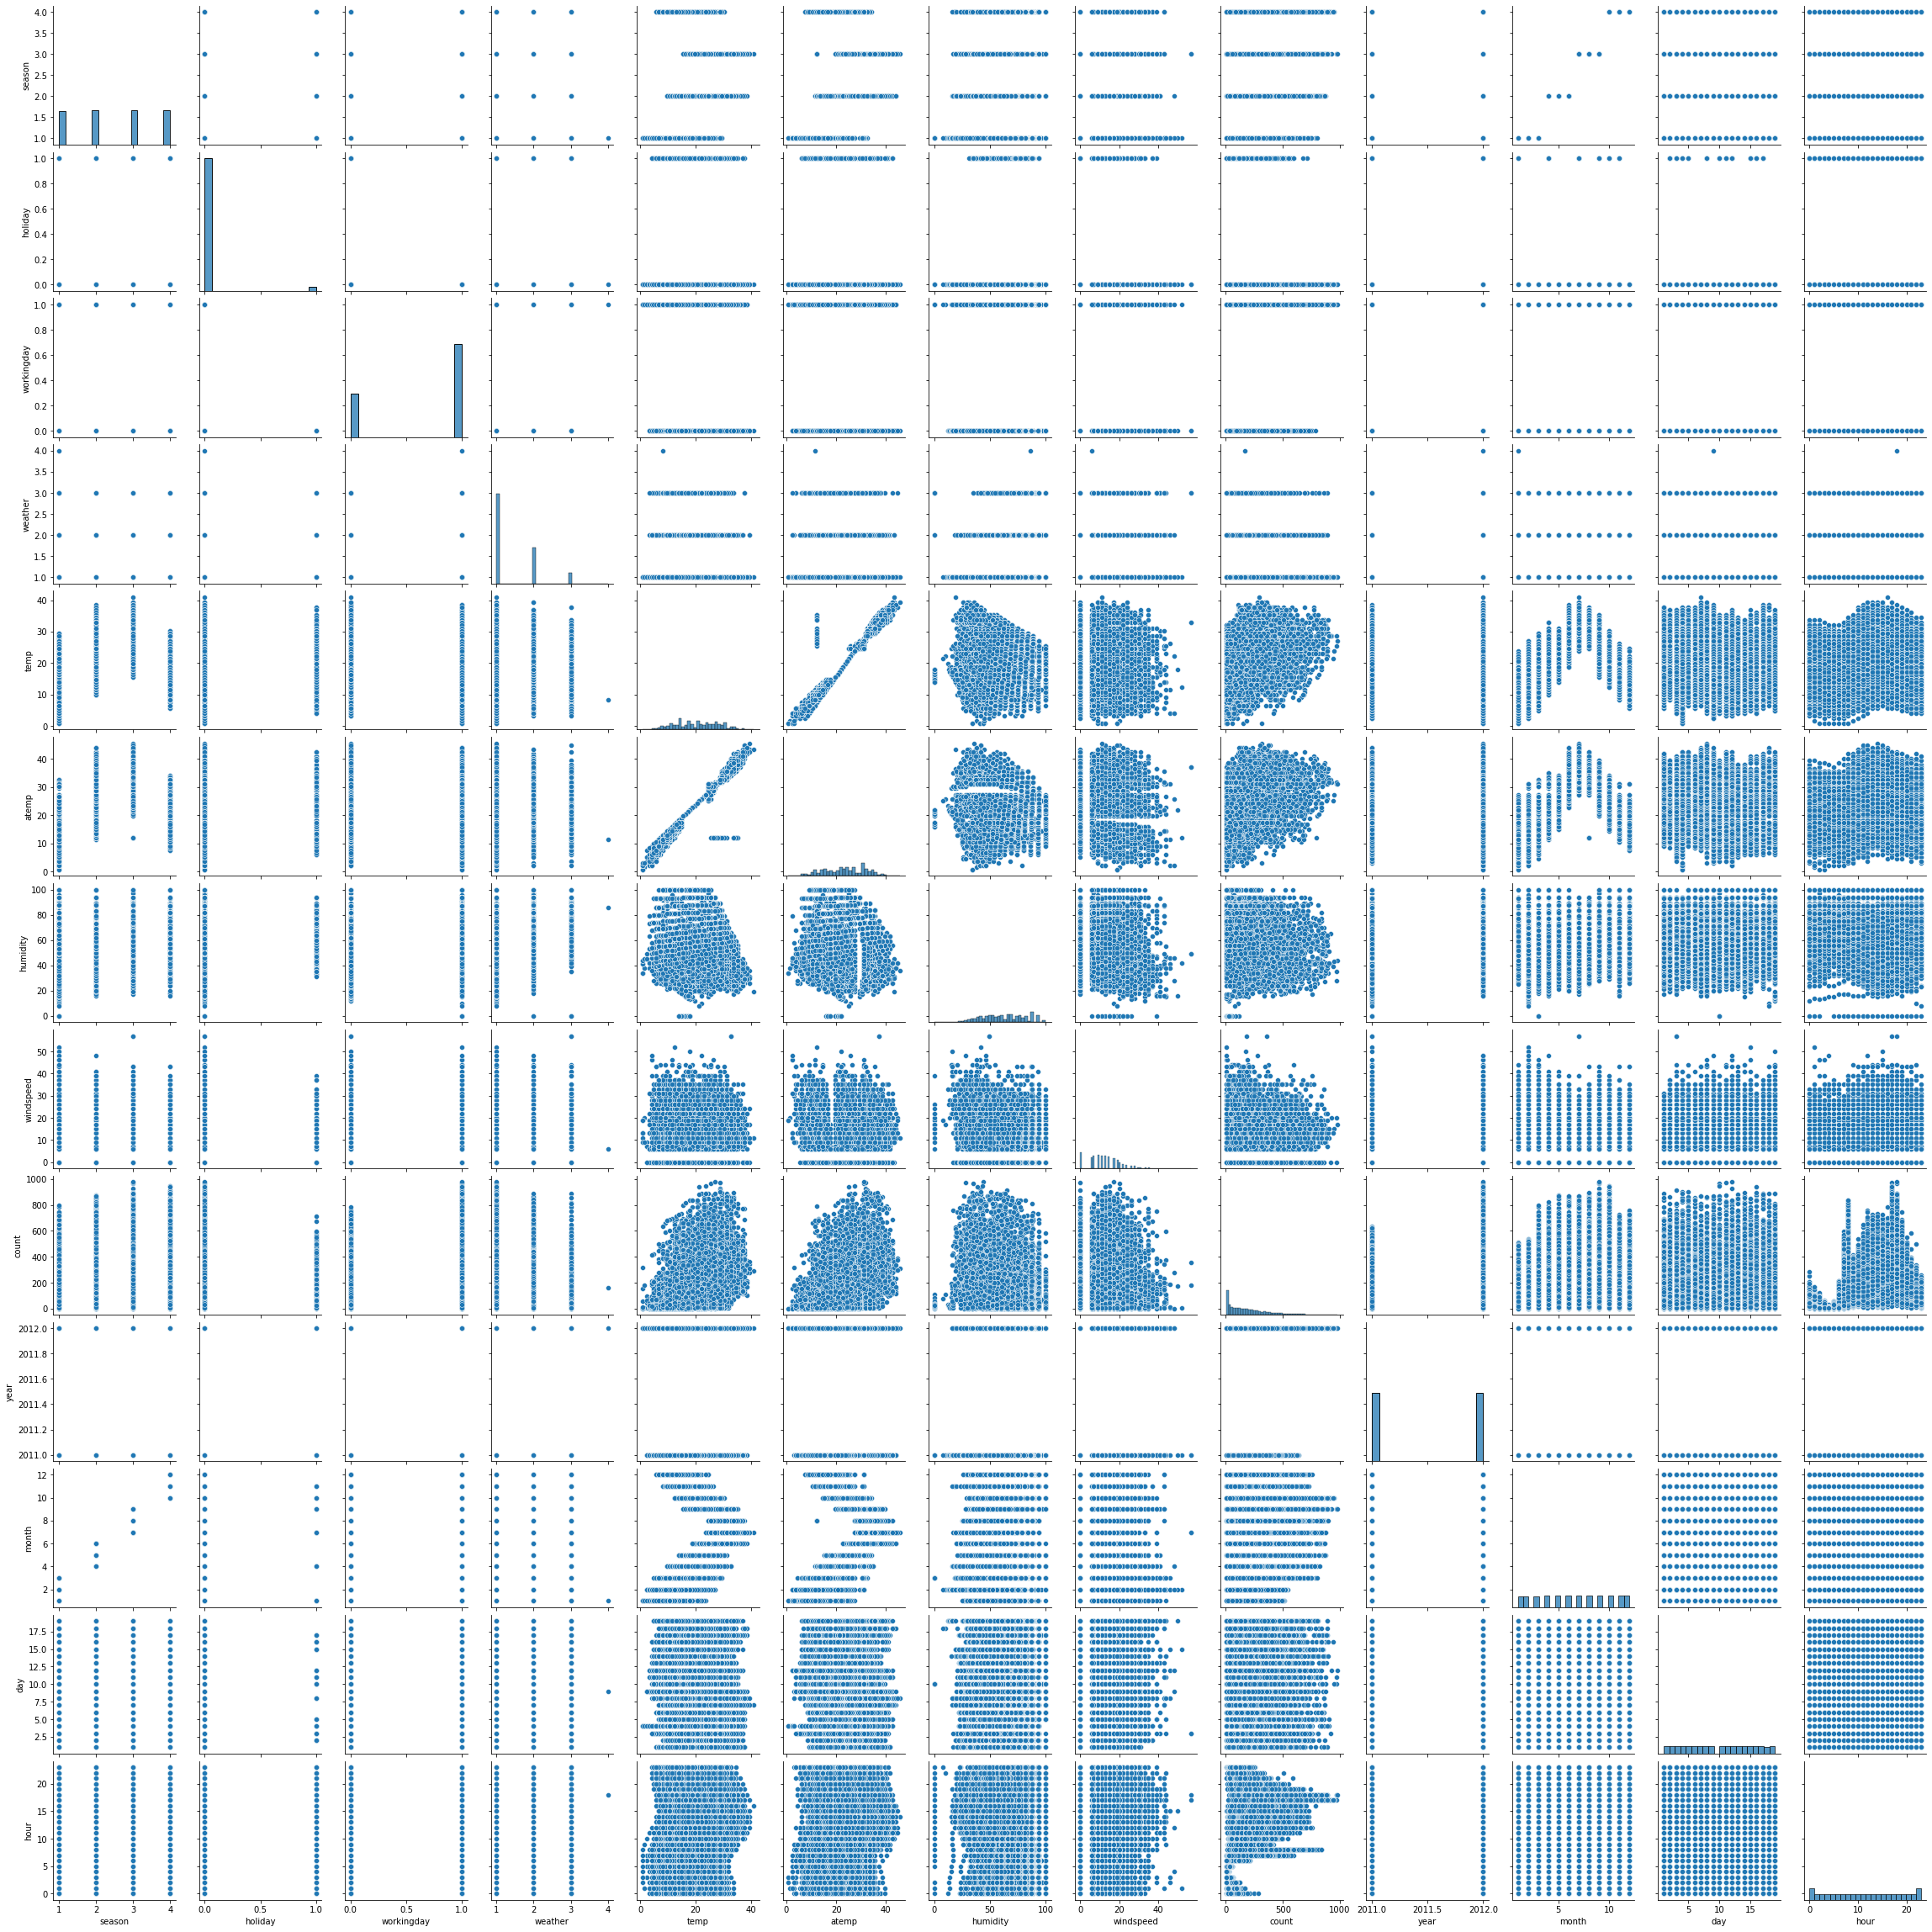

In [12]:
sns.pairplot(DF)

In [13]:
DF['day']

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int64

In [14]:
pd.set_option('display.max_row', 1000)

In [15]:
DF.iloc[400:500] # 1 <= day <= 19

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
400,1,0,1,2,9.02,11.365,87,12.9980,61,2011,1,18,16
401,1,0,1,2,9.02,11.365,82,12.9980,125,2011,1,18,17
402,1,0,1,2,9.02,11.365,80,11.0014,133,2011,1,18,18
403,1,0,1,2,9.02,11.365,80,8.9981,99,2011,1,18,19
404,1,0,1,2,9.02,13.635,87,0.0000,83,2011,1,18,20
405,1,0,1,2,9.02,12.120,93,7.0015,41,2011,1,18,21
406,1,0,1,2,9.02,12.880,93,6.0032,33,2011,1,18,22
407,1,0,1,2,9.02,13.635,93,0.0000,20,2011,1,18,23
408,1,0,1,2,9.02,13.635,93,0.0000,3,2011,1,19,0
409,1,0,1,3,9.02,11.365,93,8.9981,7,2011,1,19,1


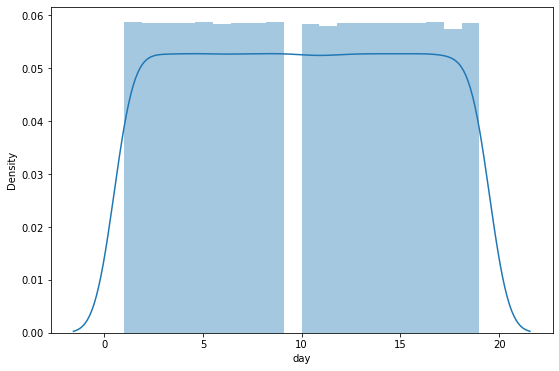

In [16]:
plt.figure(figsize = (9, 6))
sns.distplot(DF['day'],
             hist = True,
             kde = True)
plt.show()


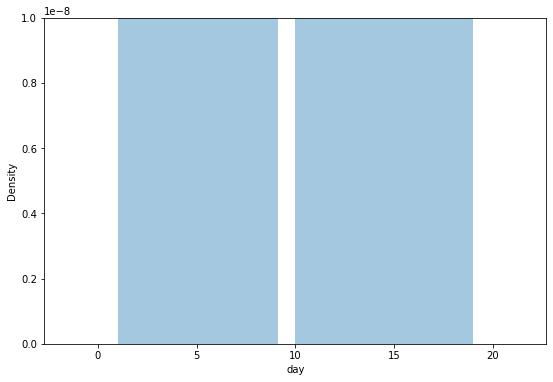

In [17]:
plt.figure(figsize = (9, 6))
sns.distplot(DF['day'],
             hist = True,
             kde = True)
plt.ylim(0, 0.00000001)
plt.show()

In [18]:
DF.iloc[600:700] # day == 10 데이터 존재

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
600,1,0,1,1,10.66,12.880,93,11.0014,3,2011,2,8,4
601,1,0,1,1,10.66,11.365,81,22.0028,2,2011,2,8,5
602,1,0,1,1,10.66,11.365,70,22.0028,39,2011,2,8,6
603,1,0,1,1,9.84,9.850,65,27.9993,100,2011,2,8,7
604,1,0,1,1,9.84,9.850,56,32.9975,243,2011,2,8,8
605,1,0,1,1,9.84,9.850,52,32.9975,135,2011,2,8,9
606,1,0,1,1,9.02,9.090,47,36.9974,48,2011,2,8,10
607,1,0,1,1,9.02,9.090,47,31.0009,50,2011,2,8,11
608,1,0,1,1,9.84,9.850,38,32.9975,65,2011,2,8,12
609,1,0,1,2,9.84,9.850,32,30.0026,50,2011,2,8,13


히스토그램은 x축 scale에 오류(?)로 10일쯤 끊어져보이지만, 실제로 막대기는 갯수는 19개 다 그려진 듯

In [19]:
DF.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour'],
      dtype='object')

holiday VS workingday 택1 <br>
temp와 windspeed VS atemp 택1 <br>
이상치 제거

In [20]:
# ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
#        'humidity', 'windspeed', 'count', 'year', 'month', 'day', 'hour']

In [21]:
# all
X = DF[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'hour']]
y = DF['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

147.26206500950423

In [22]:
# case1 : holiday & temp, windspeed
X = DF[['season', 'holiday', 'weather', 'temp',
       'humidity', 'windspeed', 'hour']]
y = DF['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

147.46124784886578

In [23]:
# case2 : holiday & atemp
X = DF[['season', 'holiday', 'weather', 'atemp',
       'humidity', 'hour']]
y = DF['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

147.23959994872848

In [24]:
# case3 : workingday & temp, windspeed
X = DF[['season', 'workingday', 'weather', 'temp',
       'humidity', 'windspeed', 'hour']]
y = DF['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

147.5000250033908

In [25]:
# case4 : workingday & atemp
X = DF[['season', 'workingday', 'weather', 'atemp',
       'humidity', 'hour']]
y = DF['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

147.2807205737127

이상 4가지 중에선 case2가 가장 좋아보임<br>
['season', 'holiday', 'weather', 'atemp', 'humidity', 'hour']


holiday, workingday 기준으로 분류하여 LinearRegression

In [26]:
# 주말(토,일)일때 (holiday == 1)
DF_holiday = DF[DF['holiday'] == 1]

#
X = DF_holiday[['season', 'weather', 'atemp',
       'humidity', 'hour']]
y = DF_holiday['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

117.18152431363812

In [27]:
# 주말(토,일)이 아닐때 (not holiday)
DF_not_holiday = DF[DF['holiday'] == 0]

#
X = DF_not_holiday[['season', 'weather', 'atemp',
       'humidity', 'hour']]
y = DF_not_holiday['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

149.13650500069292

In [28]:
# 출근하는 날(토x, 일x, 공휴일x) (working day == 1)
DF_workingday = DF[DF['workingday'] == 1]

X = DF_workingday[['season', 'weather', 'atemp',
       'humidity', 'hour']]
y = DF_workingday['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

153.19789038242496

In [29]:
# 출근 안하는 날(토 or 일 or 공휴일) (working day == 0)
DF_not_workingday = DF[DF['workingday'] == 0]

X = DF_not_workingday[['season', 'weather', 'atemp',
       'humidity', 'hour']]
y = DF_not_workingday['count']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 0)

Model = LinearRegression()
Model.fit(X_train, y_train)
y_hat = Model.predict(X_test)
mse = mean_squared_error(y_test, y_hat)

np.sqrt(mse)

121.0894237745966

따라서 DF에서 주말데이터(토,일)만을 뽑아서<br>
Model을 만들었을 때 MSE가 낮게 나옴<br>
(holiday 값(0,1)을 계산하면서 발생하는 추가적인 MSE 오차를 감안해도<br>
조금 더 잘 맞는 Model인 듯)<br>

['season', 'holiday', 'weather', 'atemp', 'humidity', 'hour'] case<br>
-> MSE == 147.23959994872848
<br>
['season', 'weather', 'atemp', 'humidity', 'hour'] 주말 한정 case<br>
-> MSE == 117.18152431363812



# 
# 
# 
# The End
# 
# 
# 